In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고 무시

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_palette('pastel')

In [3]:
# 네비게이션 데이터 경로 설정
filepath = '/Users/leeshinhaeng/Desktop/23-1 수업/데분프/데이터파일/데분프 지역별 분석 데이터'
filelist = os.listdir(filepath)

In [4]:
filelist

['.DS_Store',
 '충남_평균 체류시간.csv',
 '경북_SNS 언급량.csv',
 '서울_평균 체류시간.csv',
 '전남_평균 체류시간.csv',
 '충남_SNS 언급량.csv',
 '경북_평균 체류시간.csv',
 '충남_방문자 수.csv',
 '경남_방문자 수.csv',
 '전남_SNS 언급량.csv',
 '전남_방문자 수.csv',
 '충북_SNS 언급량.csv',
 '제주_평균 체류시간.csv',
 '경남_평균 체류시간.csv',
 '전북_SNS 언급량.csv',
 '경북_방문자 수.csv',
 '충북_방문자 수.csv',
 '서울, 제주_방문자 수.csv',
 '충북_평균 체류시간.csv',
 '경남_SNS 언급량.csv',
 '전북_방문자수.csv',
 '전북_평균 체류시간.csv',
 '서울, 제주_SNS 언급량.csv']

In [5]:
# 방문자 수 데이터 가져오기
fn1 = '서울, 제주_방문자 수.csv'
sj= pd.read_csv(filepath + '/' + fn1, encoding='euc-kr')
fn2 = '충북_방문자 수.csv'
cb = pd.read_csv(filepath + '/' + fn2)
fn3 = '충남_방문자 수.csv'
cn = pd.read_csv(filepath + '/' + fn3)
fn4 = '전북_방문자수.csv'
jb = pd.read_csv(filepath + '/' + fn4, encoding='euc-kr')
fn5 = '전남_방문자 수.csv'
jn = pd.read_csv(filepath + '/' + fn5, encoding='euc-kr')
fn6 = '경북_방문자 수.csv'
gb = pd.read_csv(filepath + '/' + fn6)
fn7 = '경남_방문자 수.csv'
gn = pd.read_csv(filepath + '/' + fn7)

In [6]:
visitors = pd.concat([sj, cb, cn, jb, jn, gb, gn])
visitors.head()

,기준연월,지역명,방문자 수
0,202201,서울특별시,42796214.0
1,202202,서울특별시,36532910.0
2,202203,서울특별시,45534626.0
3,202204,서울특별시,47546308.0
4,202205,서울특별시,49257599.0


In [7]:
visitors['지역명'][0].str.contains('충청')

0    False
0     True
0     True
0    False
0    False
0    False
0    False
Name: 지역명, dtype: bool

In [8]:
visitors['시도'] = visitors['지역명']
cc = visitors[visitors['지역명'].str.contains('충청')]
cc['시도'] = '충청도'
jr = visitors[visitors['지역명'].str.contains('전라')]
jr['시도'] = '전라도'
gs = visitors[visitors['지역명'].str.contains('경상')]
gs['시도'] = '경상도'

In [9]:
other = visitors[(visitors['지역명']=='서울특별시')|(visitors['지역명']=='제주특별자치도')]
other.head()

,기준연월,지역명,방문자 수,시도
0,202201,서울특별시,42796214.0,서울특별시
1,202202,서울특별시,36532910.0,서울특별시
2,202203,서울특별시,45534626.0,서울특별시
3,202204,서울특별시,47546308.0,서울특별시
4,202205,서울특별시,49257599.0,서울특별시


In [10]:
visitors = pd.concat([other, cc,jr,gs])
visitors

,기준연월,지역명,방문자 수,시도
0,202201,서울특별시,42796214.0,서울특별시
1,202202,서울특별시,36532910.0,서울특별시
2,202203,서울특별시,45534626.0,서울특별시
3,202204,서울특별시,47546308.0,서울특별시
4,202205,서울특별시,49257599.0,서울특별시
...,...,...,...,...
7,202208,경상남도,14282127.0,경상도
8,202209,경상남도,13592439.0,경상도
9,202210,경상남도,14028650.0,경상도
10,202211,경상남도,11919437.0,경상도


In [11]:
visitors['기준연월'] = visitors['기준연월'].astype('str')

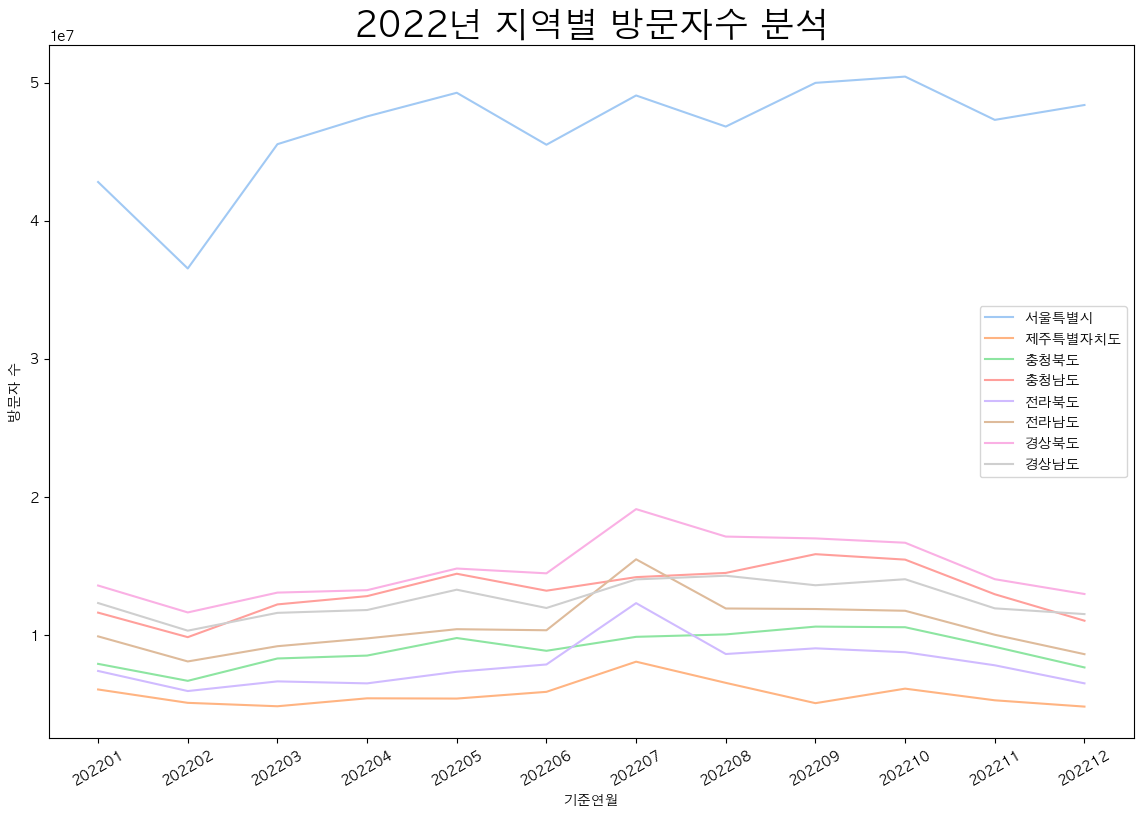

In [12]:
# 방문자수 그래프
rcParams['figure.figsize'] = 14,9
sns.lineplot(data = visitors,
           x=visitors['기준연월'],
           y=visitors['방문자 수'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 방문자수 분석', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

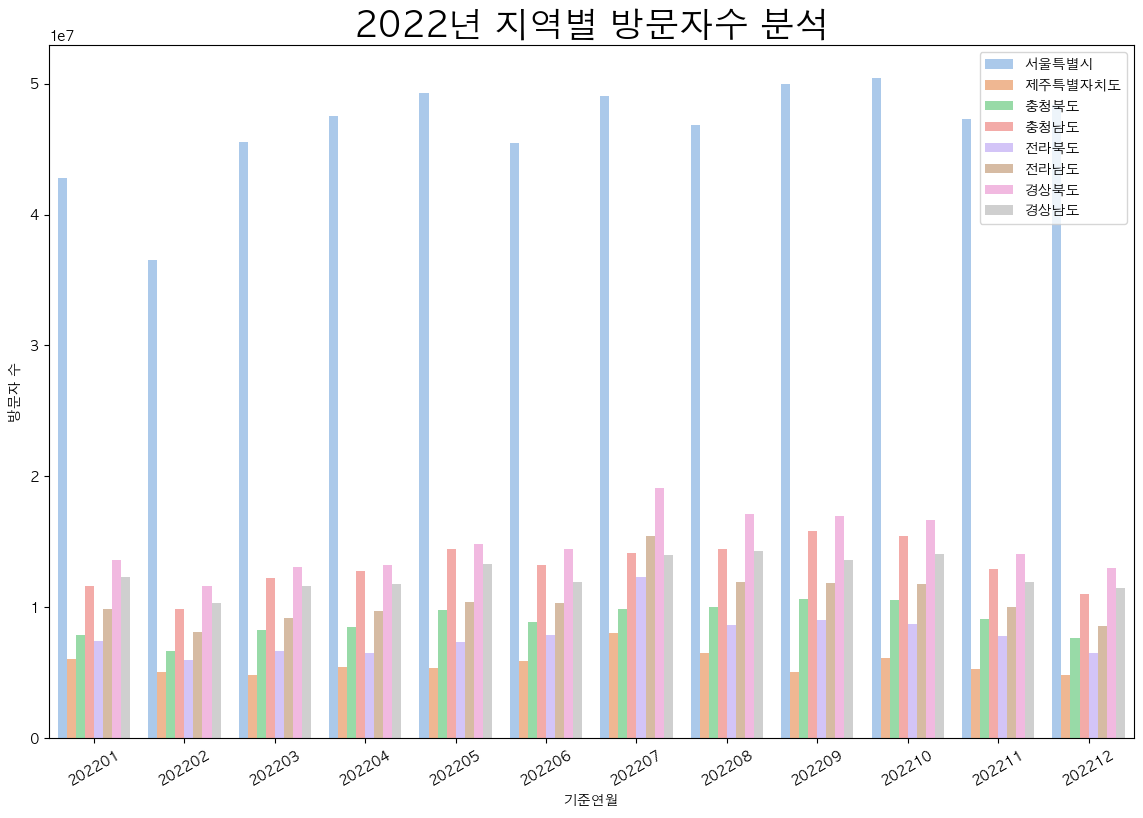

In [13]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = visitors,
           x=visitors['기준연월'],
           y=visitors['방문자 수'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 방문자수 분석', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

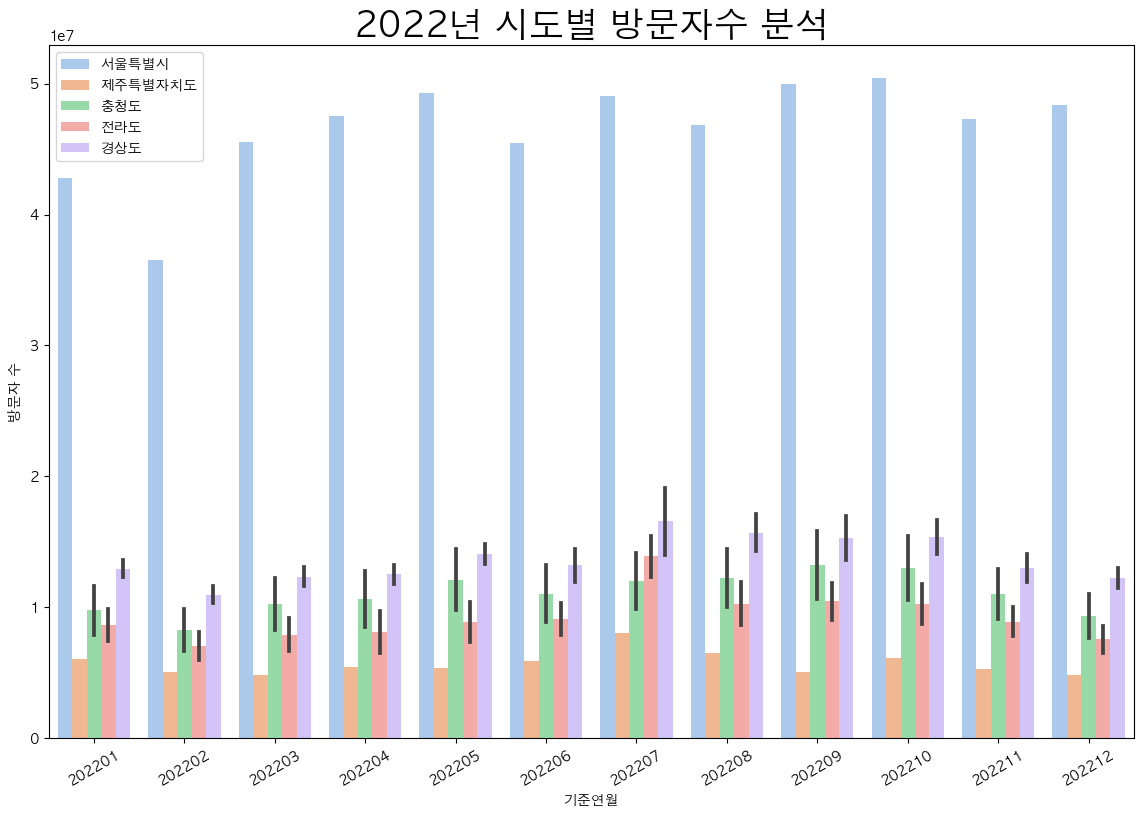

In [14]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = visitors,
           x=visitors['기준연월'],
           y=visitors['방문자 수'], hue='시도')
plt.legend(loc='best')
plt.title('2022년 시도별 방문자수 분석', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

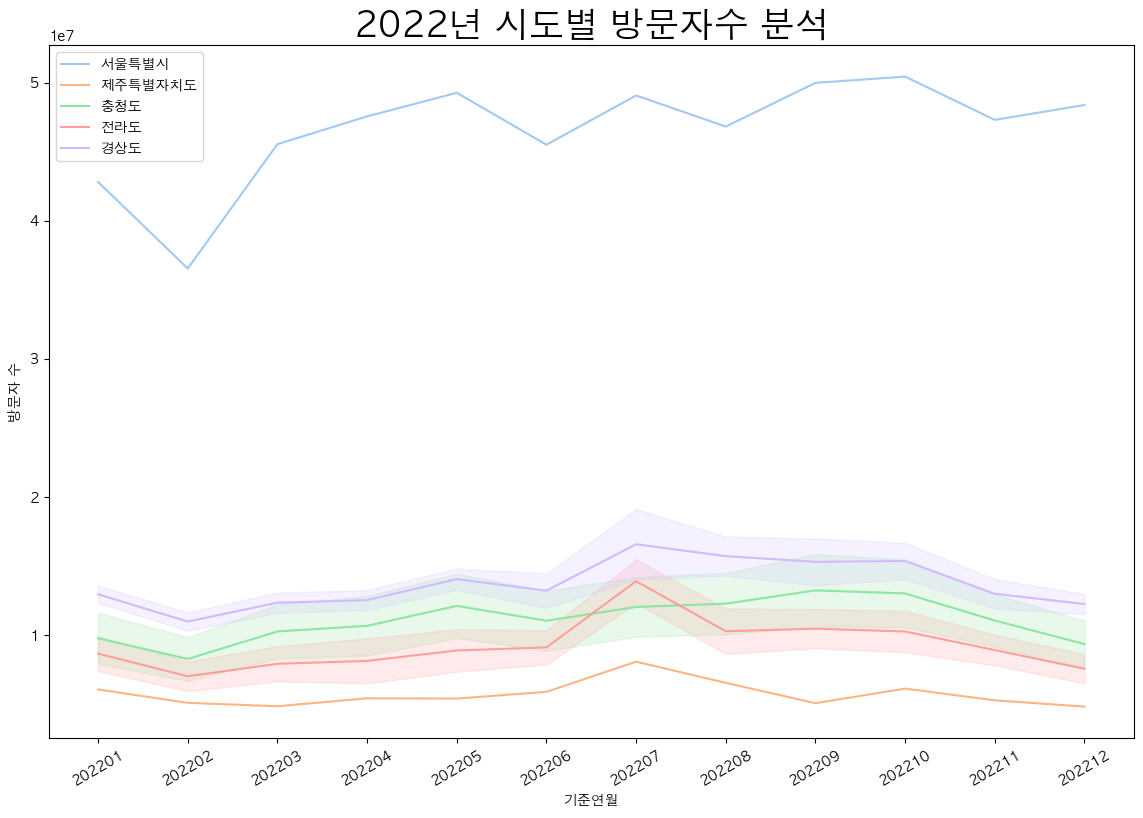

In [15]:
rcParams['figure.figsize'] = 14,9
sns.lineplot(data = visitors,
           x=visitors['기준연월'],
           y=visitors['방문자 수'], hue='시도')
plt.legend(loc='best')
plt.title('2022년 시도별 방문자수 분석', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

In [16]:
visitors2 = visitors[(visitors['지역명']!='서울특별시') & (visitors['지역명']!='제주특별자치도')]

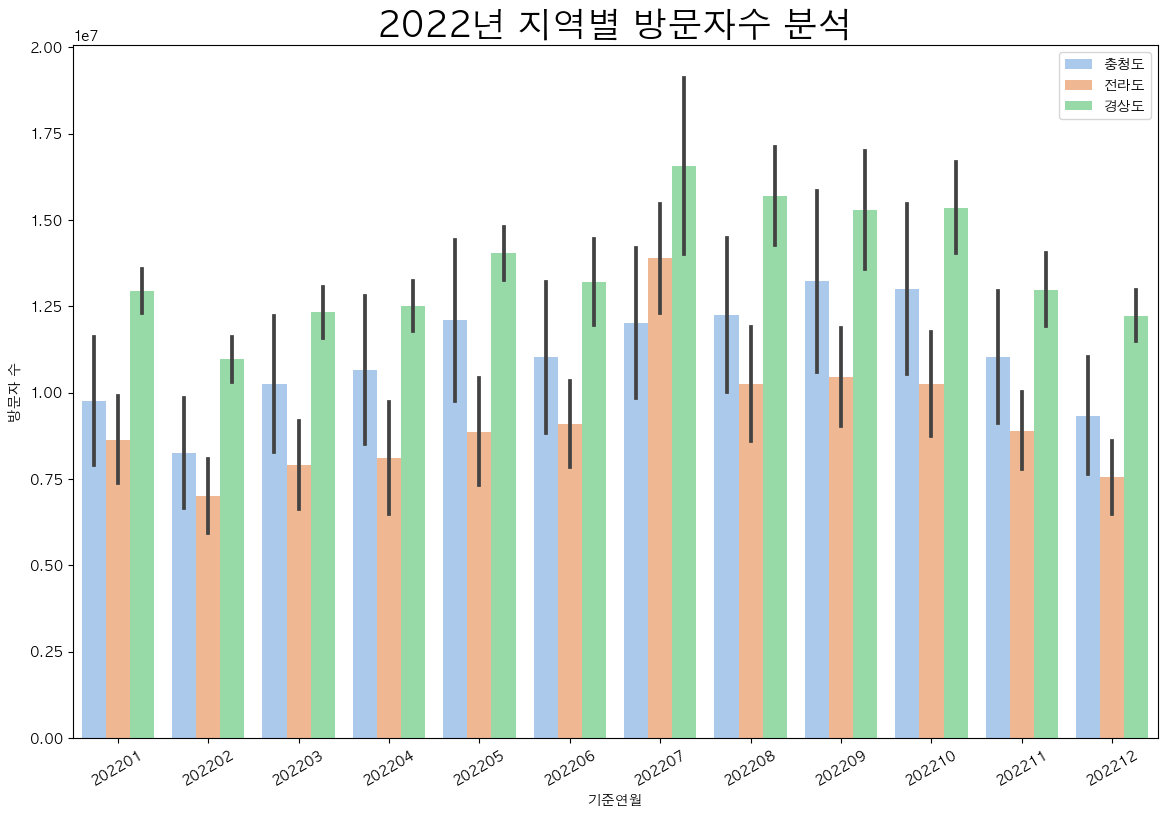

In [17]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = visitors2,
           x=visitors2['기준연월'],
           y=visitors2['방문자 수'], hue='시도')
plt.legend(loc='best')
plt.title('2022년 지역별 방문자수 분석', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

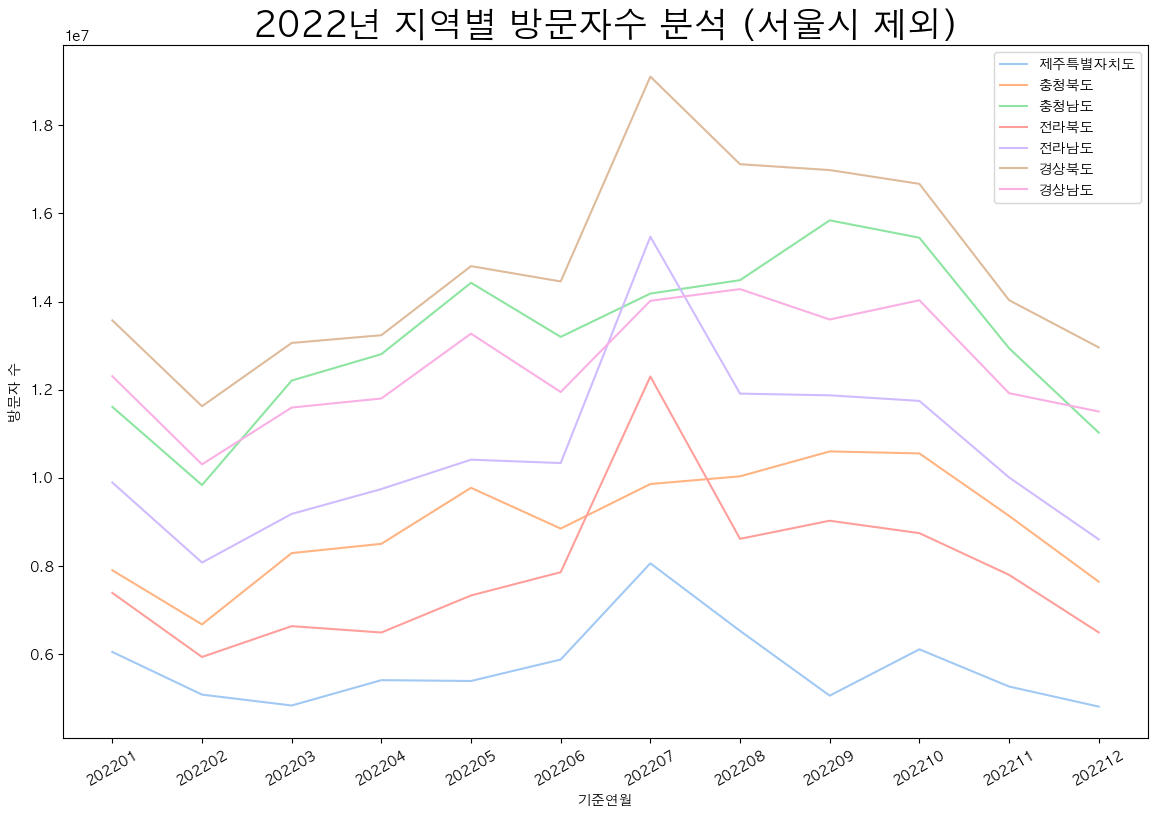

In [62]:
# 방문자수 그래프
rcParams['figure.figsize'] = 14,9
sns.lineplot(data = visitors2,
           x=visitors2['기준연월'],
           y=visitors2['방문자 수'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 방문자수 분석 (서울시 제외)', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

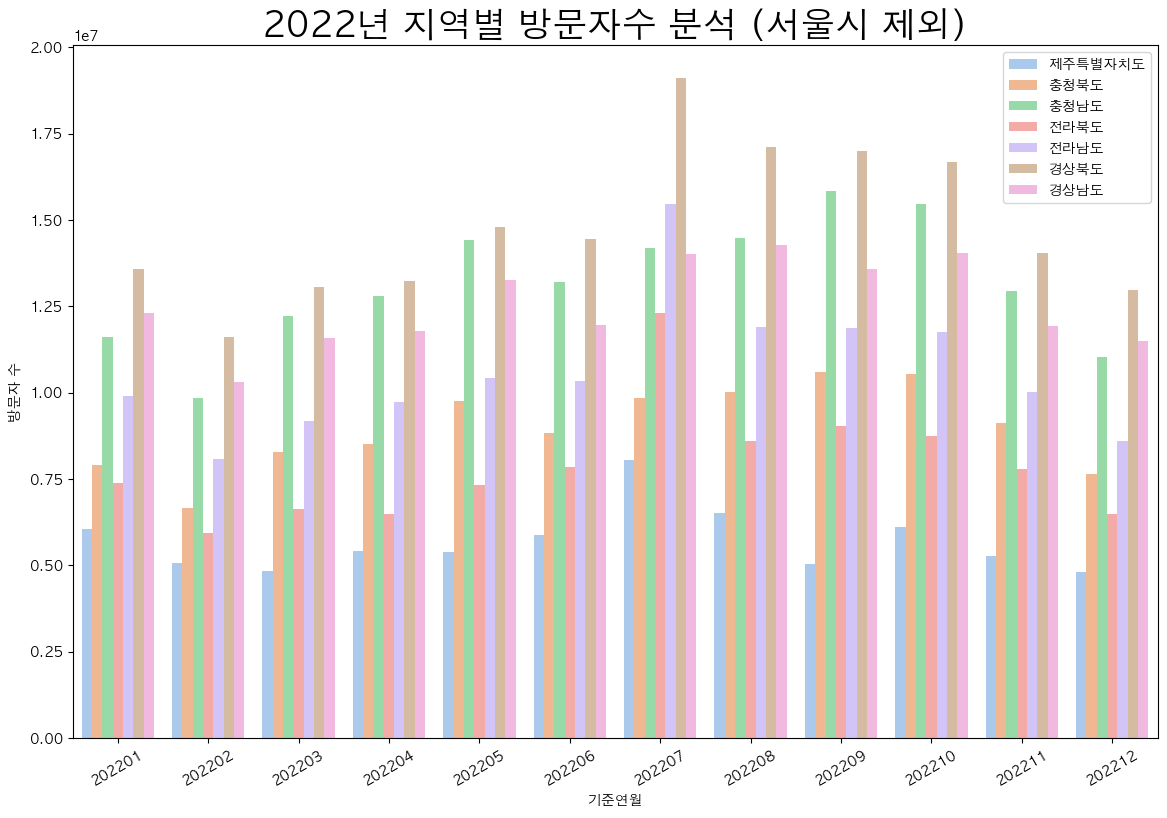

In [63]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = visitors2,
           x=visitors2['기준연월'],
           y=visitors2['방문자 수'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 방문자수 분석 (서울시 제외)', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

In [33]:
filelist

['.DS_Store',
 '충남_평균 체류시간.csv',
 '경북_SNS 언급량.csv',
 '서울_평균 체류시간.csv',
 '전남_평균 체류시간.csv',
 '충남_SNS 언급량.csv',
 '경북_평균 체류시간.csv',
 '충남_방문자 수.csv',
 '경남_방문자 수.csv',
 '전남_SNS 언급량.csv',
 '전남_방문자 수.csv',
 '충북_SNS 언급량.csv',
 '제주_평균 체류시간.csv',
 '경남_평균 체류시간.csv',
 '전북_SNS 언급량.csv',
 '경북_방문자 수.csv',
 '충북_방문자 수.csv',
 '서울, 제주_방문자 수.csv',
 '충북_평균 체류시간.csv',
 '경남_SNS 언급량.csv',
 '전북_방문자수.csv',
 '전북_평균 체류시간.csv',
 '서울, 제주_SNS 언급량.csv']

In [19]:
# sns 언급량 데이터 가져오기
fn1 = '서울, 제주_SNS 언급량.csv'
sj= pd.read_csv(filepath + '/' + fn1, encoding='euc-kr')
fn2 = '충북_SNS 언급량.csv'
cb = pd.read_csv(filepath + '/' + fn2)
fn3 = '충남_SNS 언급량.csv'
cn = pd.read_csv(filepath + '/' + fn3)
fn4 = '전북_SNS 언급량.csv'
jb = pd.read_csv(filepath + '/' + fn4, encoding='euc-kr')
fn5 = '전남_SNS 언급량.csv'
jn = pd.read_csv(filepath + '/' + fn5, encoding='euc-kr')
fn6 = '경북_SNS 언급량.csv'
gb = pd.read_csv(filepath + '/' + fn6)
fn7 = '경남_SNS 언급량.csv'
gn = pd.read_csv(filepath + '/' + fn7)

In [20]:
snscount = pd.concat([sj, cb, cn, jb, jn, gb, gn])
snscount.head()

,기준연월,지역명,검색량(건)
0,202201,서울특별시,71206
1,202202,서울특별시,79527
2,202203,서울특별시,84037
3,202204,서울특별시,108614
4,202205,서울특별시,98548


In [21]:
snscount['시도'] = snscount['지역명']
cc = snscount[snscount['지역명'].str.contains('충청')]
cc['시도'] = '충청도'
jr = snscount[snscount['지역명'].str.contains('전라')]
jr['시도'] = '전라도'
gs = snscount[snscount['지역명'].str.contains('경상')]
gs['시도'] = '경상도'
other = snscount[(snscount['지역명']=='서울특별시')|(snscount['지역명']=='제주특별자치도')]
snscount = pd.concat([other, cc,jr,gs])
snscount

,기준연월,지역명,검색량(건),시도
0,202201,서울특별시,71206,서울특별시
1,202202,서울특별시,79527,서울특별시
2,202203,서울특별시,84037,서울특별시
3,202204,서울특별시,108614,서울특별시
4,202205,서울특별시,98548,서울특별시
...,...,...,...,...
7,202208,경상남도,7287,경상도
8,202209,경상남도,5838,경상도
9,202210,경상남도,6937,경상도
10,202211,경상남도,6239,경상도


In [22]:
snscount['기준연월'] = snscount['기준연월'].astype('str')

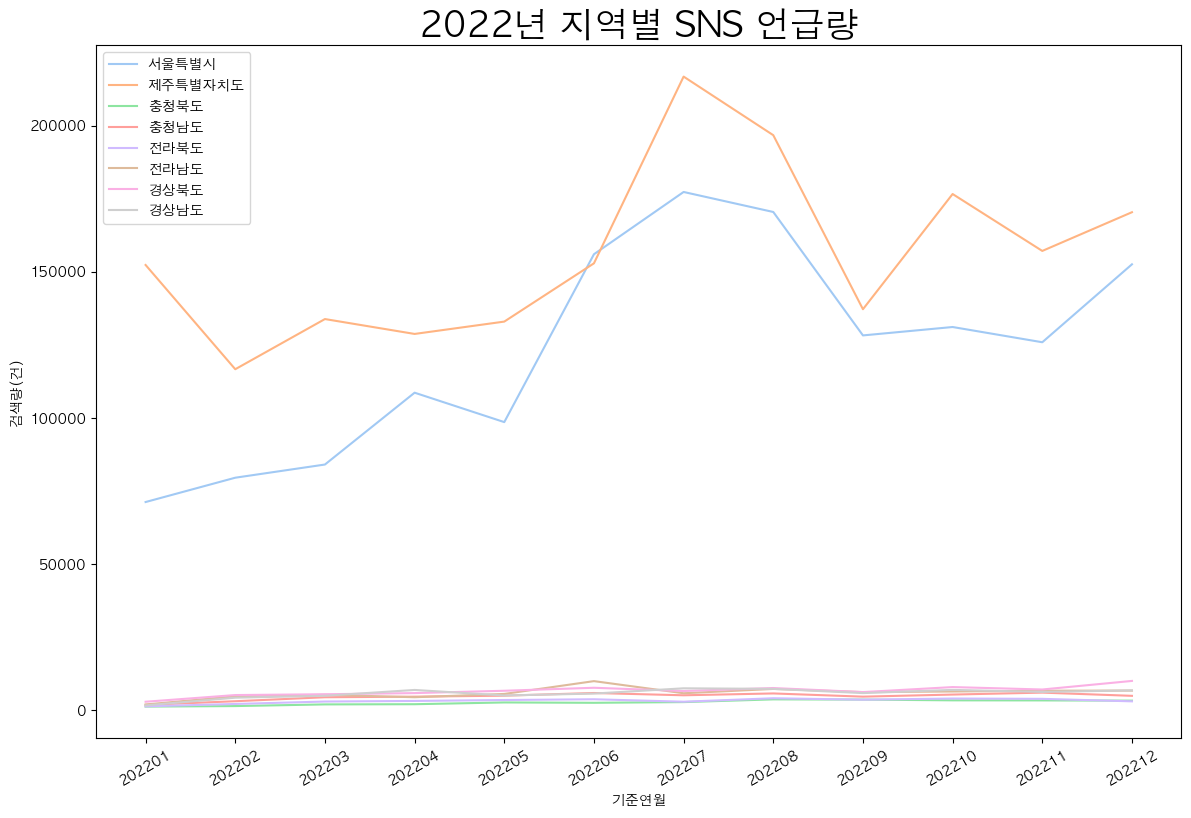

In [23]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.lineplot(data = snscount,
           x=snscount['기준연월'],
           y=snscount['검색량(건)'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

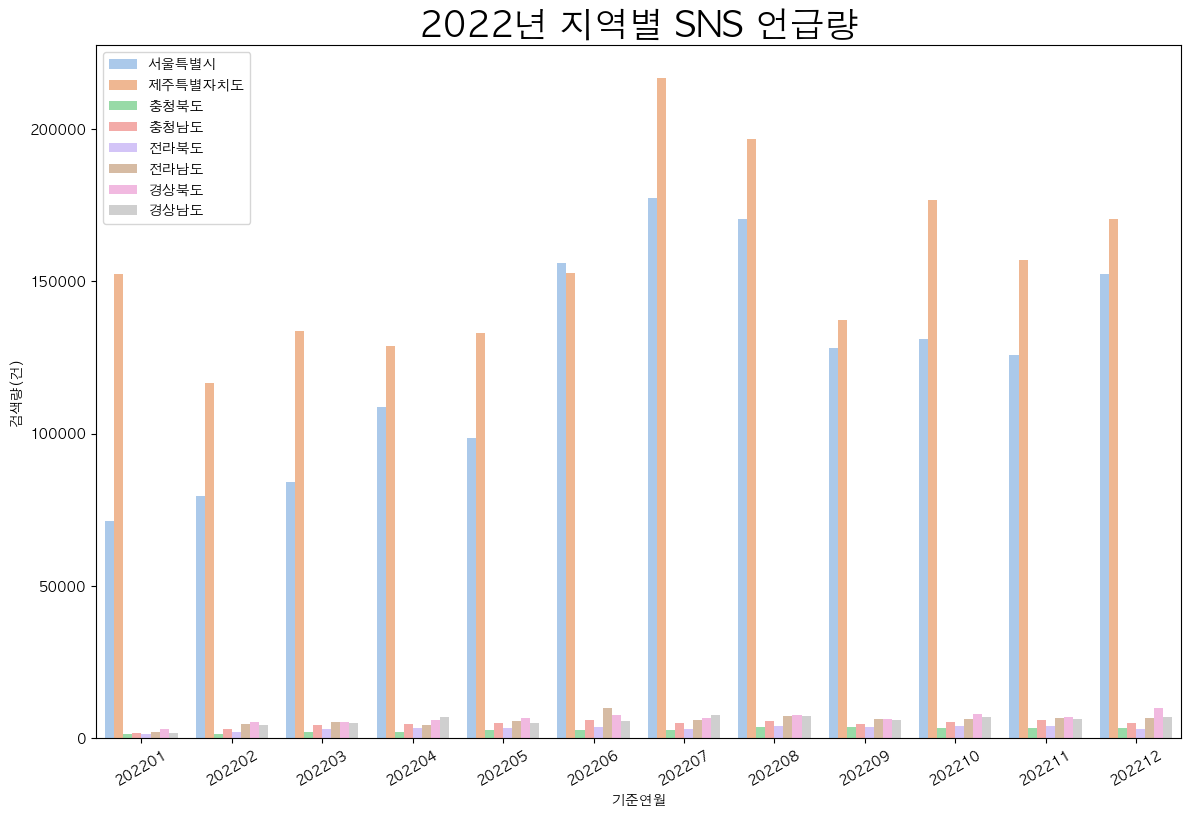

In [24]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.barplot(data = snscount,
           x=snscount['기준연월'],
           y=snscount['검색량(건)'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

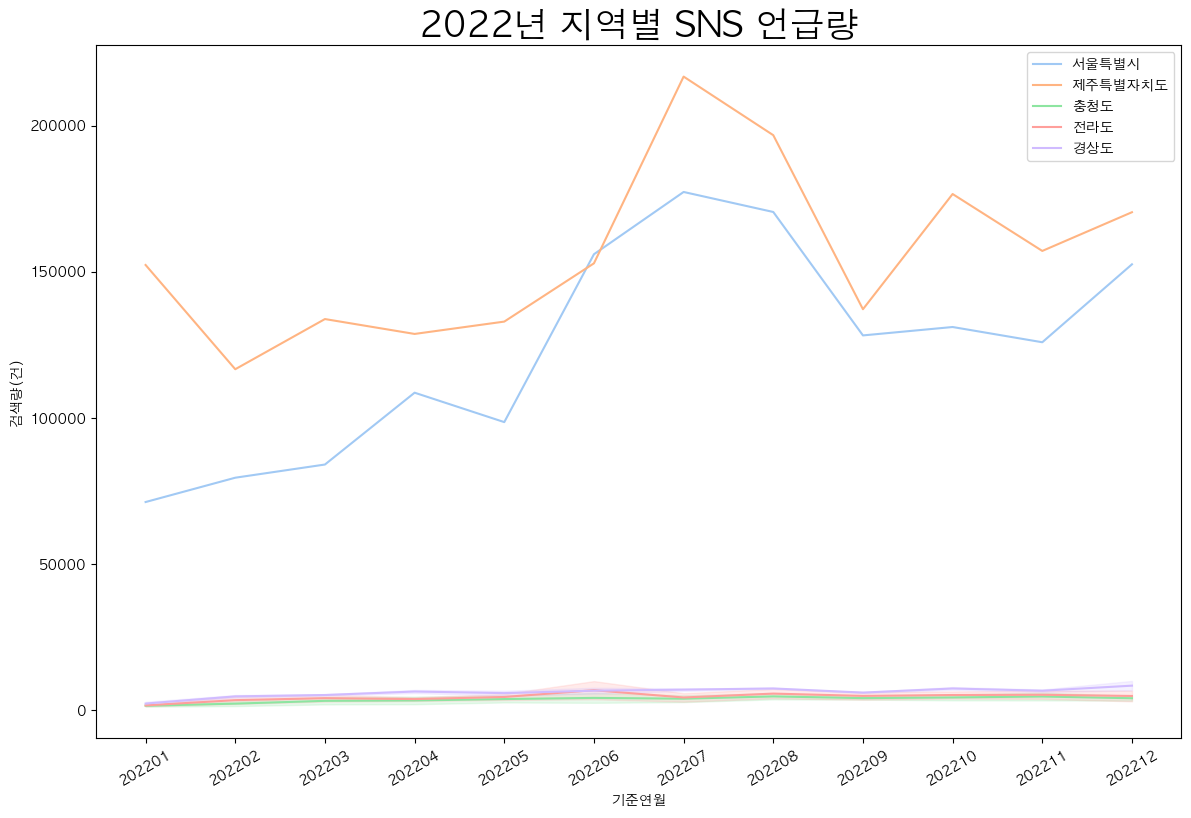

In [25]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.lineplot(data = snscount,
           x=snscount['기준연월'],
           y=snscount['검색량(건)'], hue='시도')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

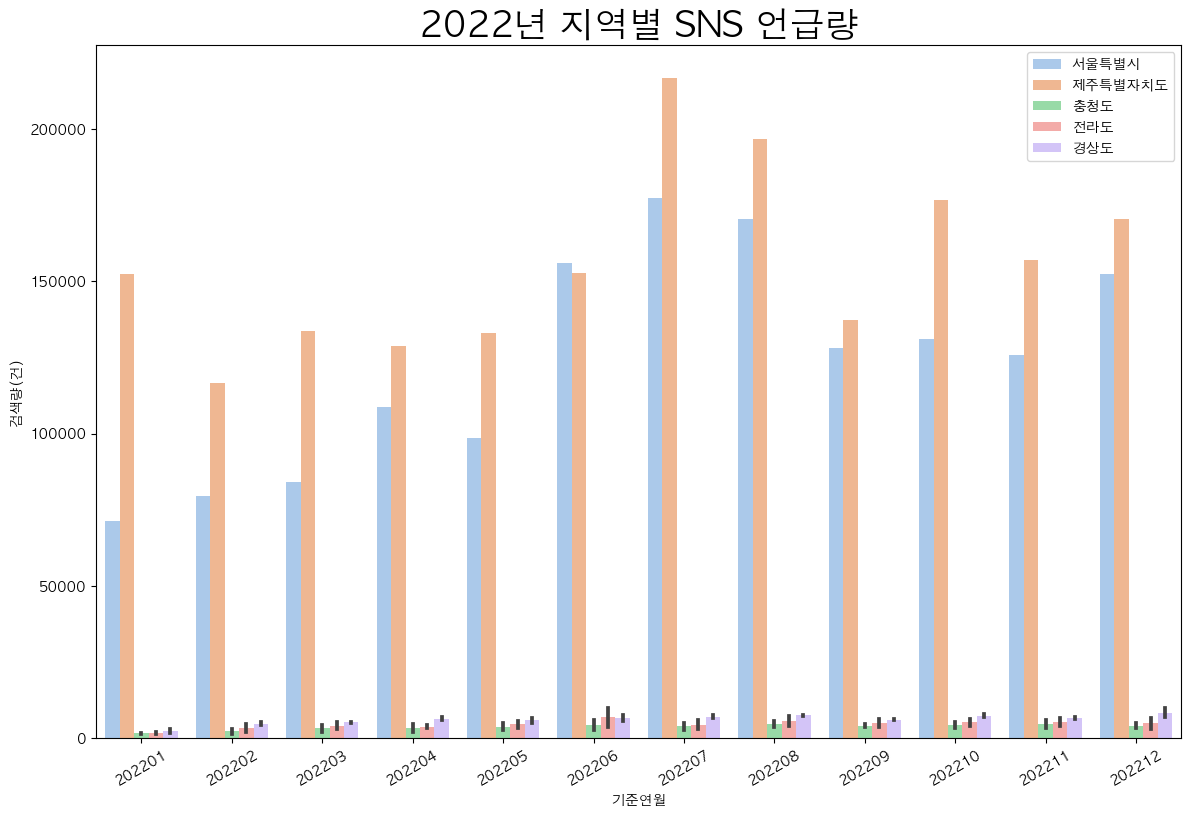

In [26]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.barplot(data = snscount,
           x=snscount['기준연월'],
           y=snscount['검색량(건)'], hue='시도')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

In [27]:
snscount2 = snscount[(snscount['지역명']!='서울특별시')&(snscount['지역명']!='제주특별자치도')]

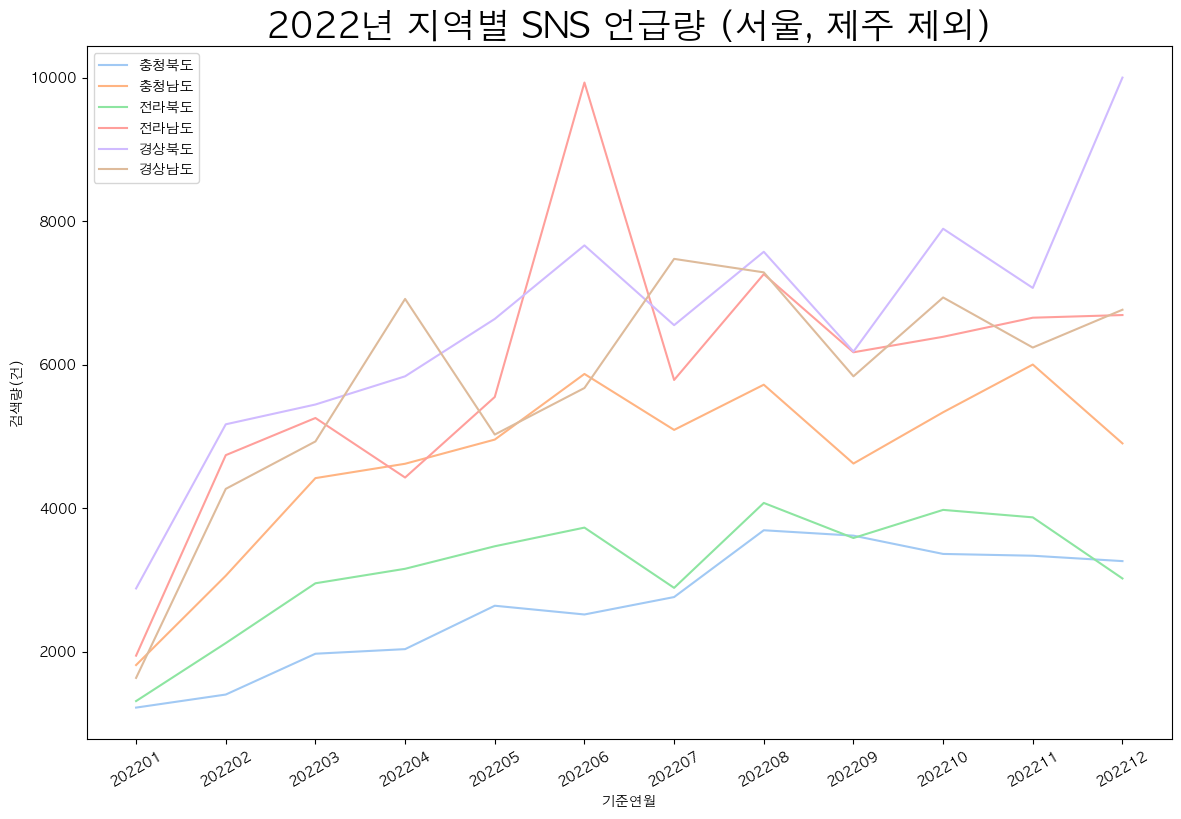

In [28]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.lineplot(data = snscount2,
           x=snscount2['기준연월'],
           y=snscount2['검색량(건)'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량 (서울, 제주 제외)', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

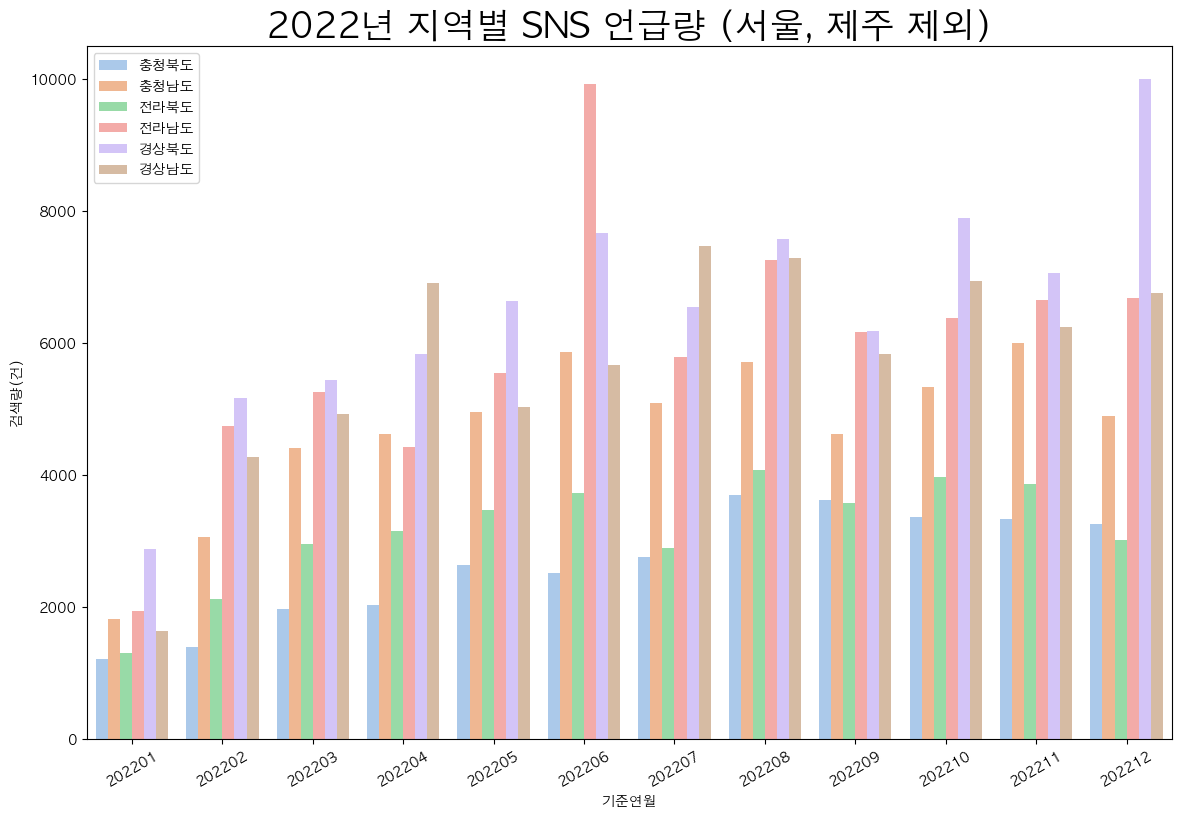

In [29]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.barplot(data = snscount2,
           x=snscount2['기준연월'],
           y=snscount2['검색량(건)'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량 (서울, 제주 제외)', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

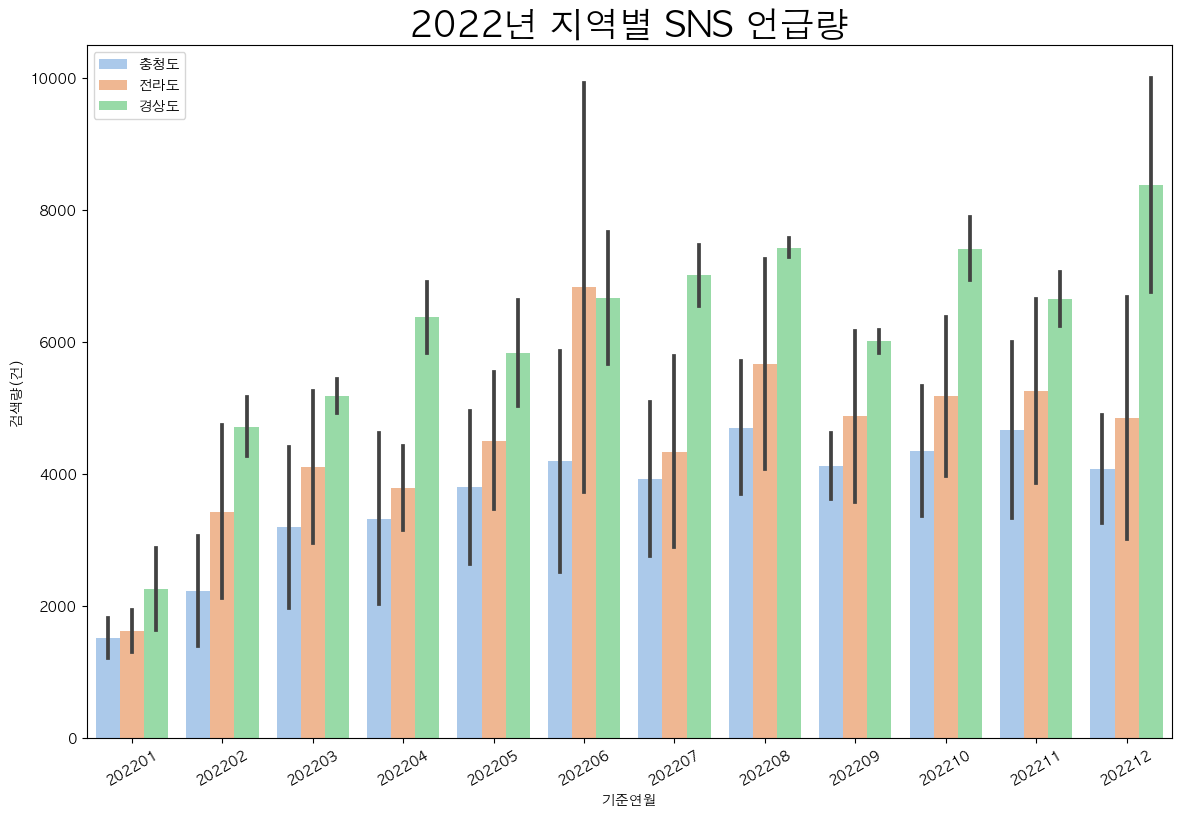

In [30]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.barplot(data = snscount2,
           x=snscount2['기준연월'],
           y=snscount2['검색량(건)'], hue='시도')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

In [67]:
snscount3 = snscount2[(snscount2['지역명']!='경상북도')&(snscount2['지역명']!='경상남도')]

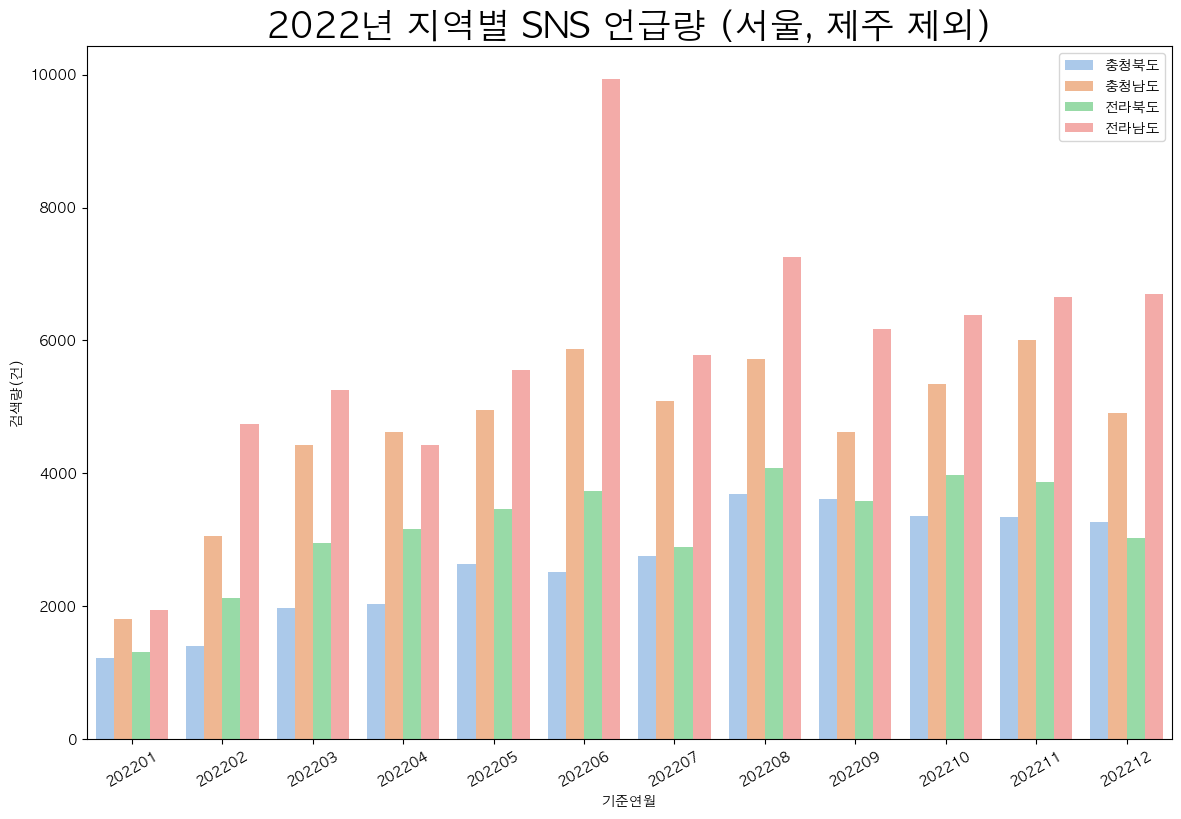

In [68]:
# SNS 언급량 그래프
rcParams['figure.figsize'] = 14,9
sns.barplot(data = snscount3,
           x=snscount3['기준연월'],
           y=snscount3['검색량(건)'], hue='지역명')
plt.legend(loc='best')
plt.title('2022년 지역별 SNS 언급량 (서울, 제주 제외)', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

- 6월달에 많았던게 누리호때문..

In [48]:
filelist

['.DS_Store',
 '충남_평균 체류시간.csv',
 '경북_SNS 언급량.csv',
 '서울_평균 체류시간.csv',
 '전남_평균 체류시간.csv',
 '충남_SNS 언급량.csv',
 '경북_평균 체류시간.csv',
 '충남_방문자 수.csv',
 '경남_방문자 수.csv',
 '전남_SNS 언급량.csv',
 '전남_방문자 수.csv',
 '충북_SNS 언급량.csv',
 '제주_평균 체류시간.csv',
 '경남_평균 체류시간.csv',
 '전북_SNS 언급량.csv',
 '경북_방문자 수.csv',
 '충북_방문자 수.csv',
 '서울, 제주_방문자 수.csv',
 '충북_평균 체류시간.csv',
 '경남_SNS 언급량.csv',
 '전북_방문자수.csv',
 '전북_평균 체류시간.csv',
 '서울, 제주_SNS 언급량.csv']

In [79]:
# sns 언급량 데이터 가져오기
fn1 = '서울_평균 체류시간.csv'
so= pd.read_csv(filepath + '/' + fn1)
fn2 = '충북_평균 체류시간.csv'
cb = pd.read_csv(filepath + '/' + fn2)
fn3 = '충남_평균 체류시간.csv'
cn = pd.read_csv(filepath + '/' + fn3)
fn4 = '전북_평균 체류시간.csv'
jb = pd.read_csv(filepath + '/' + fn4)
fn5 = '전남_평균 체류시간.csv'
jn = pd.read_csv(filepath + '/' + fn5)
fn6 = '경북_평균 체류시간.csv'
gb = pd.read_csv(filepath + '/' + fn6)
fn7 = '경남_평균 체류시간.csv'
gn = pd.read_csv(filepath + '/' + fn7)
fn8 = fn1 = '제주_평균 체류시간.csv'
jj= pd.read_csv(filepath + '/' + fn8)

In [80]:
so['지역']='서울특별시'
cb['지역']='충청북도'
cn['지역']='충청남도'
jb['지역']='전라북도'
jn['지역']='전라남도'
gb['지역']='경상북도'
gn['지역']='경상남도'
jj['지역']='제주특별자치도'

In [81]:
staytime = pd.concat([so, cb, cn, jb, jn, gb, gn, jj])
staytime.head()

,기준연월,방문자 수,평균 체류시간,지역
0,202201,42734465.0,355.0,서울특별시
1,202202,36439388.0,366.0,서울특별시
2,202203,45451545.0,348.0,서울특별시
3,202204,47440581.0,324.0,서울특별시
4,202205,49074415.0,300.0,서울특별시


In [84]:
staytime['시도'] = staytime['지역']
cc = staytime[staytime['지역'].str.contains('충청')]
cc['시도'] = '충청도'
jr = staytime[staytime['지역'].str.contains('전라')]
jr['시도'] = '전라도'
gs = staytime[staytime['지역'].str.contains('경상')]
gs['시도'] = '경상도'

other = staytime[(staytime['지역']=='서울특별시')|(staytime['지역']=='제주특별자치도')]
other.head()

staytime = pd.concat([other, cc,jr,gs])
staytime

,기준연월,방문자 수,평균 체류시간,지역,시도
0,202201,42734465.0,355.0,서울특별시,서울특별시
1,202202,36439388.0,366.0,서울특별시,서울특별시
2,202203,45451545.0,348.0,서울특별시,서울특별시
3,202204,47440581.0,324.0,서울특별시,서울특별시
4,202205,49074415.0,300.0,서울특별시,서울특별시
...,...,...,...,...,...
7,202208,14263378.0,454.0,경상남도,경상도
8,202209,13592882.0,477.0,경상남도,경상도
9,202210,14028650.0,394.0,경상남도,경상도
10,202211,11919437.0,408.0,경상남도,경상도


In [85]:
staytime['기준연월'] = staytime['기준연월'].astype('str')

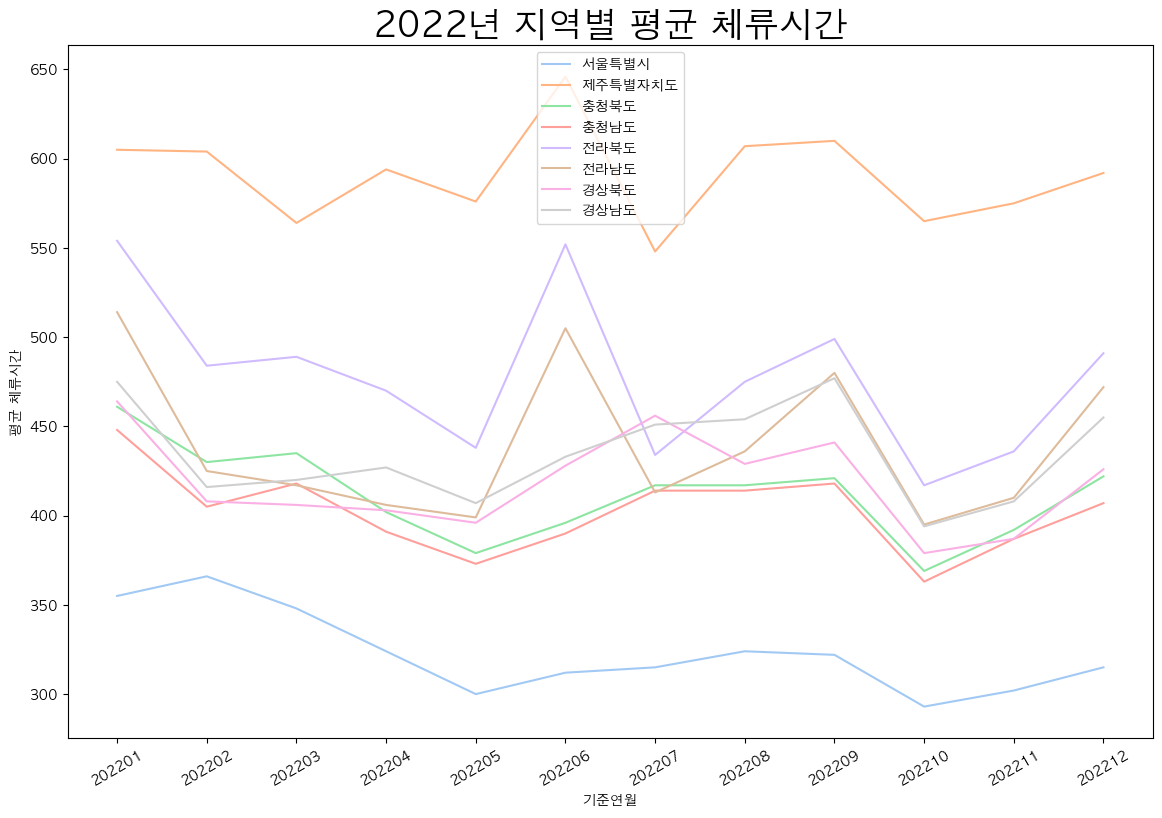

In [86]:
# 체류시간 그래프
rcParams['figure.figsize'] = 14,9
sns.lineplot(data = staytime,
           x=staytime['기준연월'],
           y=staytime['평균 체류시간'], hue='지역')
plt.legend(loc='best')
plt.title('2022년 지역별 평균 체류시간', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

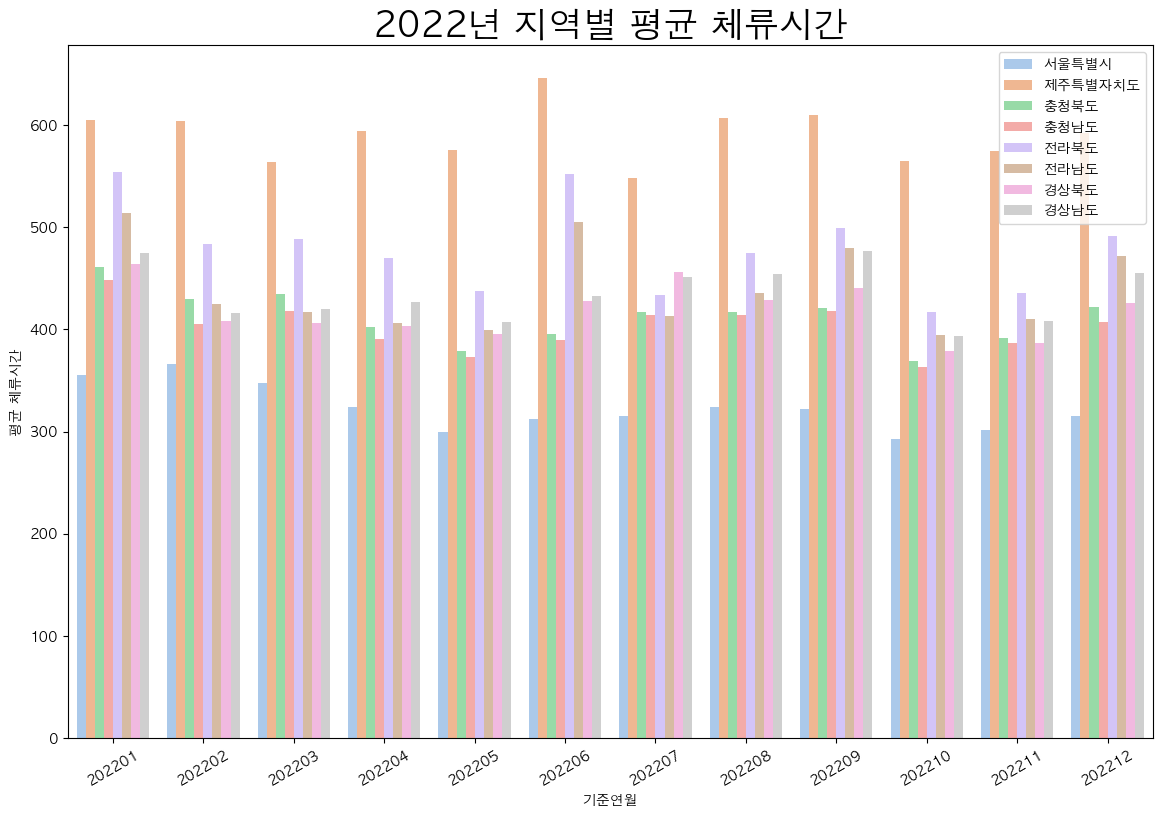

In [87]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = staytime,
           x=staytime['기준연월'],
           y=staytime['평균 체류시간'], hue='지역')
plt.legend(loc='best')
plt.title('2022년 지역별 평균 체류시간', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()

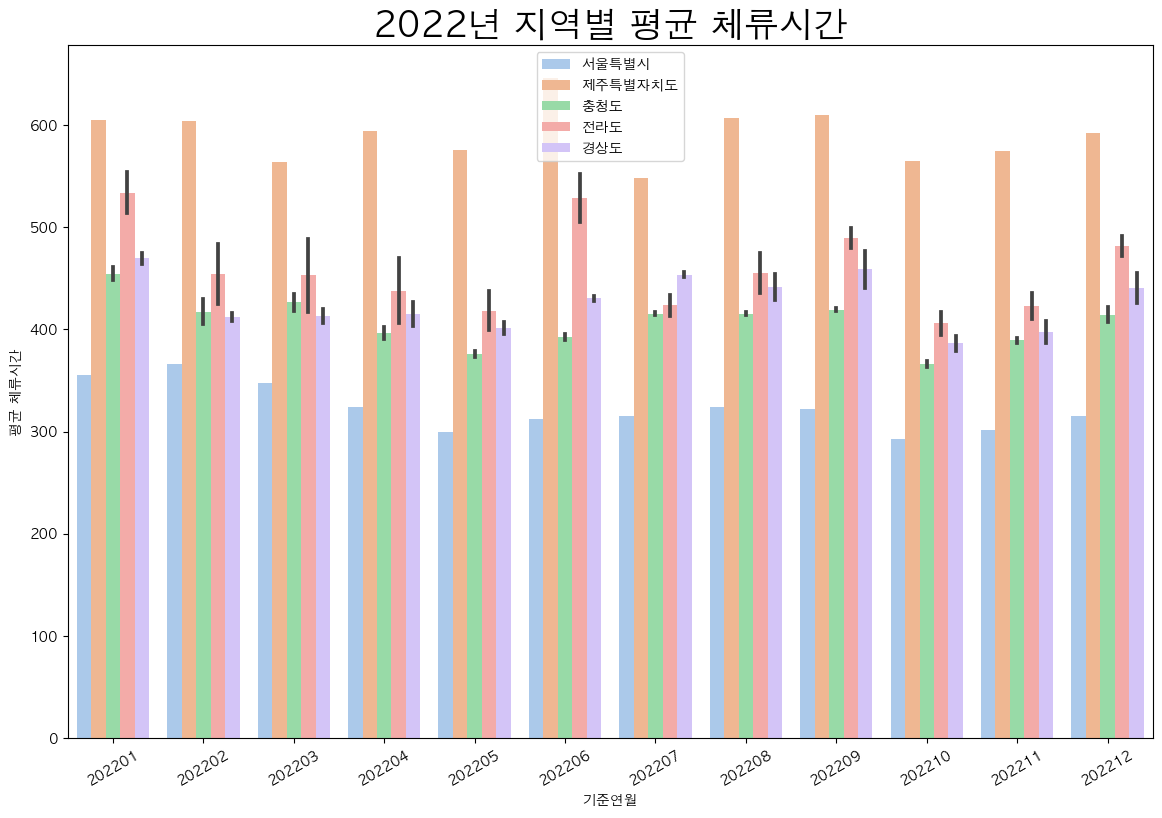

In [88]:
rcParams['figure.figsize'] = 14,9
sns.barplot(data = staytime,
           x=staytime['기준연월'],
           y=staytime['평균 체류시간'], hue='시도')
plt.legend(loc='best')
plt.title('2022년 지역별 평균 체류시간', fontsize=25)

plt.xticks(rotation=30,size=10)
plt.show()